In [1]:
"""Reads in and plots data generated from L. Roberts' C++ code for the isothermal case"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def readData(path):
    """Reads in csv data generated by L. Roberts' code for isothermal winds
    Takes file path (string) and returns an array of data sets, where each set is a 2D array of x, u, s values for a given x0"""
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()

    dataPartitioned=[]
    last=0
    #print(dataFull)
    for i in range(len(dataFull)):
        if dataFull[i][0]==0:
            dataPartitioned.append(np.array(dataFull[last:i-1],dtype=float))
            #print(dataFull[last:i-1])
            last=i
    dataPartitioned.append(np.array(dataFull[last:-1],dtype=float))
    #print(dataPartitioned)
    return dataPartitioned

def plotData(dataPartitioned,xmax=50,ymax=5,allplots=False):
    '''Takes an array of data sets and plots u vs x, returns 0 and outputs the plot'''
    
    if allplots:
        plt.figure(1)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("r/r0 as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,1]),s=1)
        plt.figure(2)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("v/cs as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),s=1)
        plt.figure(3)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,3]),s=1)
        plt.figure(4)
        plt.xlim(1, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of r/r0")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(np.exp(dataPartitioned[i][:,1]),np.exp(dataPartitioned[i][:,3]),s=1)
        plt.figure(5)
        plt.xlim(1, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of v/cs")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),np.exp(dataPartitioned[i][:,3]),s=1)
    
    plt.figure(6)
    plt.xlim(1, xmax)
    plt.ylim(0, ymax)
    plt.title("v/cs as a function of r/r0")
    for i in range(len(dataPartitioned)):
        #plt.figure(i+6)    #uncomment to separate graphs
        plt.scatter(np.exp(dataPartitioned[i][:,1]),np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),s=1)
    
    plt.figure(100)
    plt.xlim(1, xmax)
    plt.ylim(0, ymax)
    plt.scatter(np.exp(dataPartitioned[-1][:,1]),np.exp(dataPartitioned[-1][:,2]-dataPartitioned[i][:,3]/2),s=1)
    return 0

In [2]:
"""Reads in data for a single curve from my C++ code and plots it"""

def readMyData(path):
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()
    return dataFull

d2=readMyData("../C++/NDWSolver/NDWSolver/output.txt")
plt.scatter(np.exp(d2[:,1]),np.exp(d2[:,2]-d2[:,3]/2),s=1);

FileNotFoundError: [Errno 2] No such file or directory: '../C++/NDWSolver/NDWSolver/output.txt'

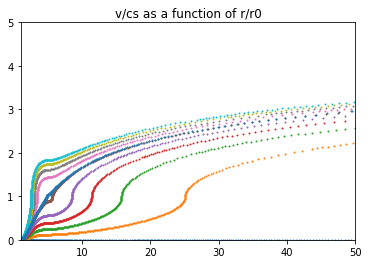

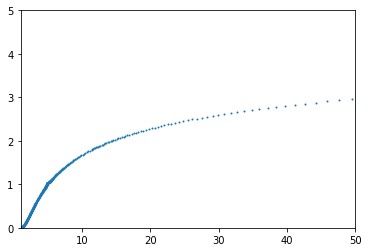

In [226]:
d=readData("../C++/NDWSolver/NDWSolver/isothermal.txt");
plotData(d);

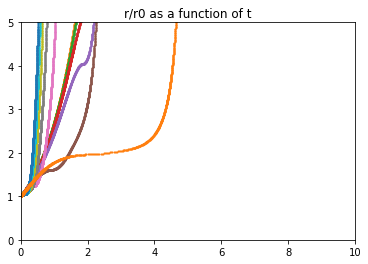

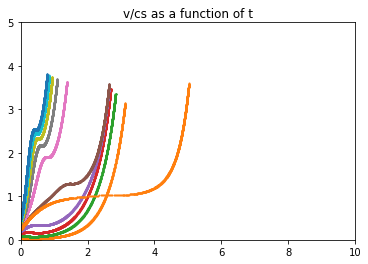

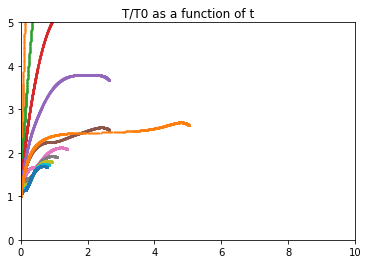

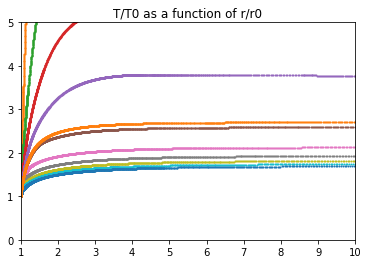

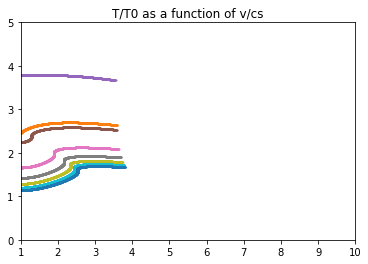

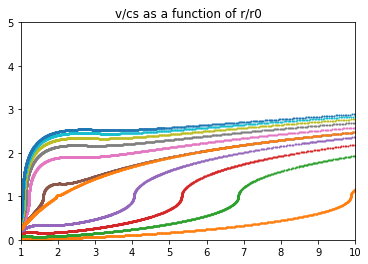

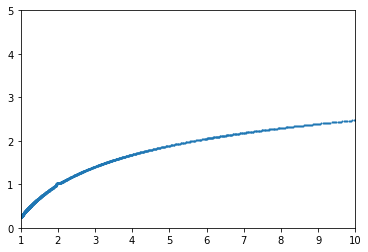

In [231]:
d=readData("../C++/NDWSolver/NDWSolver/gammaheating.txt");
plotData(d,10,5,allplots=True);

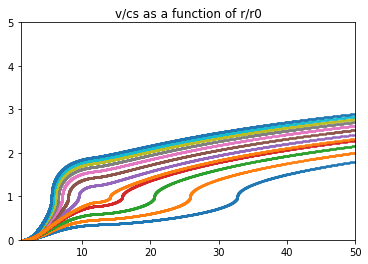

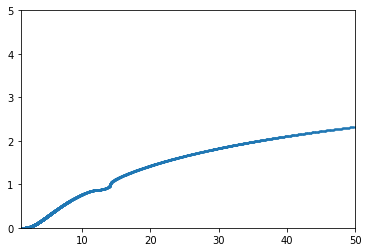

In [44]:
d=readData("../C++/NDWSolver/NDWSolver/gammahc.txt");
plotData(d,50,5,allplots=False);

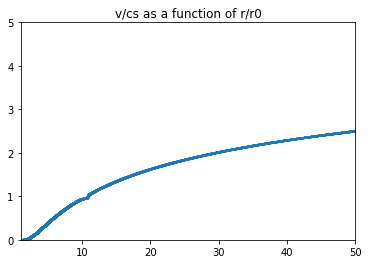

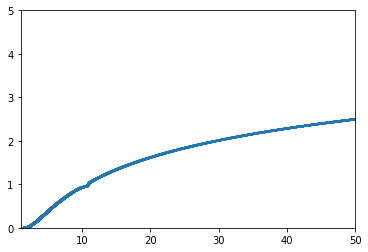

In [40]:
d=readData("../C++/NDWSolver/NDWSolver/output.txt");
plotData(d,50,5,allplots=False);

15404
15315
15187
15097
15020
15049
15226
15105
15133
15424
36538


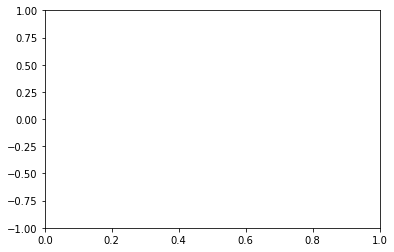

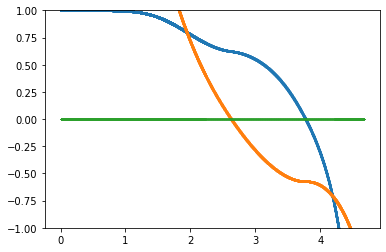

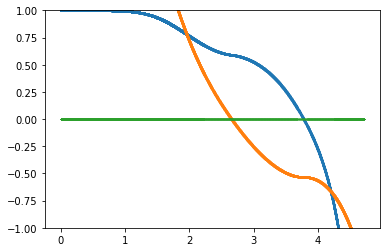

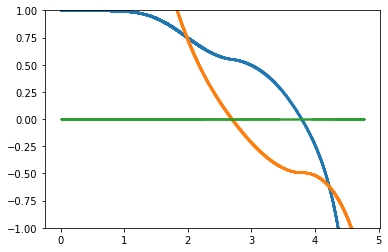

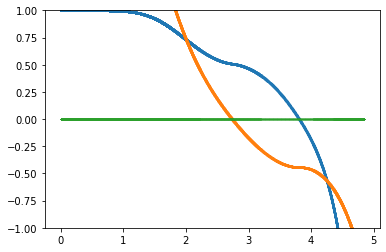

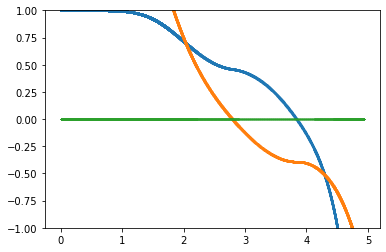

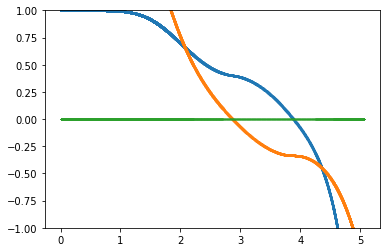

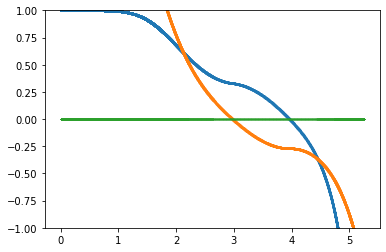

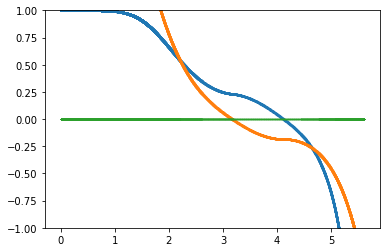

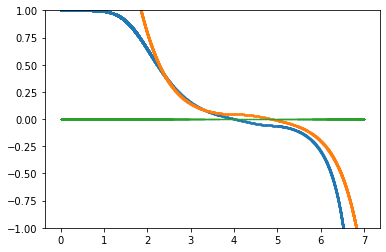

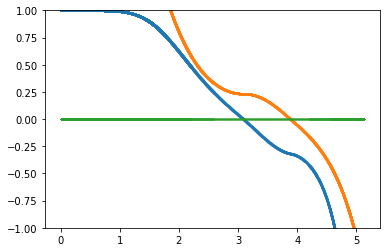

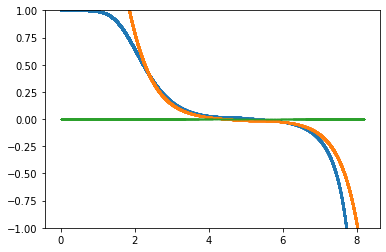

In [32]:
plt.figure(1000)
#plt.xlim(0, 7)
plt.ylim(-1, 1)
for loc in range(len(d)):
    plt.figure(loc)
    plt.ylim(-1, 1)
    print(len(d[loc][:,0]))
    plt.scatter(d[loc][:,0], 1-np.exp(2*d[loc][:,2]-d[loc][:,3]),s=1)
    plt.scatter(d[loc][:,0], 10*np.exp(-d[loc][:,1]-d[loc][:,3])-2,s=1)
    #plt.scatter(d[loc][:,0], (1-np.exp(2*d[loc][:,2]-d[loc][:,3]))+(10*np.exp(-d[loc][:,1]-d[loc][:,3])-2),s=1)
    plt.scatter(d[loc][:,0],np.zeros(len(d[loc])),s=.1)
